In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# WCS

The header of a FITS file image may contain World Coordinate System (WCS) keywords; these defines the transformation to map the pixel locations in the image to their real-world units, such as their position on the sky sphere.

`astropy.wcs` contains utilities for managing World Coordinate System (WCS) transformations in FITS files.

http://docs.astropy.org/en/stable/wcs/


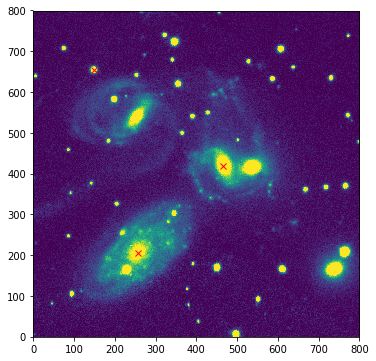

In [2]:
from astropy.io import fits
from astropy.wcs import WCS

fitsfile="stephans_quintet.fits"
# lists of RA and DEC of 3 objects
ra=[338.993270,339.014381,339.025233]
dec=[33.966057,33.948273,33.985596]

hdr=fits.getheader(fitsfile,0)
ima=fits.getdata(fitsfile,0)

wcs=WCS(hdr) # create the wcs from the header

x,y=wcs.all_world2pix(ra,dec,0)

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(ima,origin='lower',vmin=0,vmax=.5)
ax.plot(x,y,'xr')

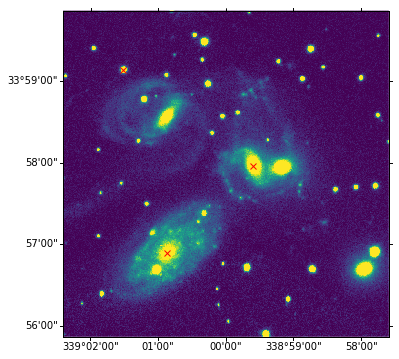

In [3]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection=wcs)
ax.imshow(ima,origin='lower',vmin=0,vmax=.5)
ax.plot(ra,dec,'xr',transform=ax.get_transform('world'))

# cutouts with astropy

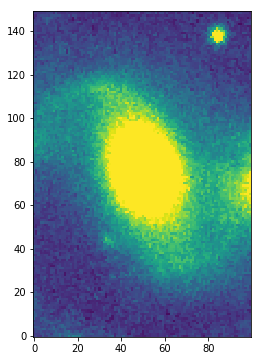

In [4]:
from astropy.nddata import Cutout2D

position=x[0],y[0]

size = (150, 100) # in pixels

cutout = Cutout2D(ima, position, size)

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(cutout.data,origin='lower',vmin=0,vmax=.5)

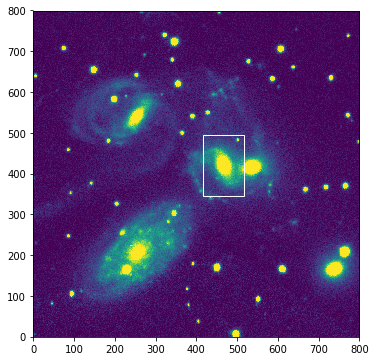

In [5]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(ima,origin='lower',vmin=0,vmax=.5)
cutout.plot_on_original(color='white')

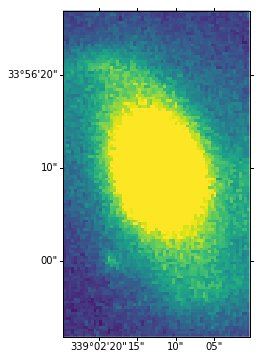

In [6]:
from astropy import units as u
from astropy.coordinates import SkyCoord

position=SkyCoord(ra=ra[0]*u.degree,dec=dec[0]*u.degree)
size = (35*u.arcsec,20*u.arcsec)
cutout = Cutout2D(ima, position, size, wcs=wcs)

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection=wcs)
ax.imshow(cutout.data,origin='lower',vmin=0,vmax=.5)
